# **Import Libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# **Reading Data**

In [62]:
data = pd.read_csv('melb_data.csv')

In [63]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# **Data Understanding**

**Melbourne Housing Market dataset**, commonly used in ML projects. Here’s what each column represents:

1. **Suburb** – The suburb (neighborhood) where the property is located.
2. **Address** – The specific street address of the property.
3. **Rooms** – The number of rooms in the property (bedrooms/living rooms).
4. **Type** – The type of dwelling:

   * `h` = house, cottage, villa, semi, terrace
   * `u` = unit, duplex
   * `t` = townhouse
5. **Price** – The sale price of the property in Australian dollars (target column in prediction tasks).
6. **Method** – The method of sale:

   * `S` = property sold
   * `SP` = property sold prior to auction
   * `PI` = property passed in
   * `VB` = vendor bid
   * `SA` = sold after auction
7. **SellerG** – Real estate agency/company that sold the property.
8. **Date** – The date the property was sold.
9. **Distance** – Distance (in kilometers) from Melbourne’s Central Business District (CBD).
10. **Postcode** – Postal code of the property’s location.
11. **Bedroom2** – Number of bedrooms (sometimes slightly different from `Rooms`).
12. **Bathroom** – Number of bathrooms.
13. **Car** – Number of car spots/garage spaces.
14. **Landsize** – Size of the land (in square meters).
15. **BuildingArea** – Size of the building (in square meters).
16. **YearBuilt** – The year the property was originally constructed.
17. **CouncilArea** – The governing council for the property’s suburb.
18. **Lattitude** – Geographical latitude coordinate.
19. **Longtitude** – Geographical longitude coordinate.
20. **Regionname** – General region where the property is located (e.g., “Northern Metropolitan”, “Western Metropolitan”).
21. **Propertycount** – Number of properties in the suburb (gives density of housing in the area).


# **Exploratory Data Analysis (EDA)**

- **Data Info**

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

- **Data Types**

In [65]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

- **Data Description**

In [66]:
data.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [67]:
data.describe(include='number')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


- **Missing Values**

In [68]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [69]:
# Missing values in percentage

((data.isna().sum() / data.shape[0] ) * 100).round(2) 

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price             0.00
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.46
Landsize          0.00
BuildingArea     47.50
YearBuilt        39.58
CouncilArea      10.08
Lattitude         0.00
Longtitude        0.00
Regionname        0.00
Propertycount     0.00
dtype: float64

- **Check Duplicated Data**

In [70]:
data.duplicated().sum()

np.int64(0)

- **Check Outliers**

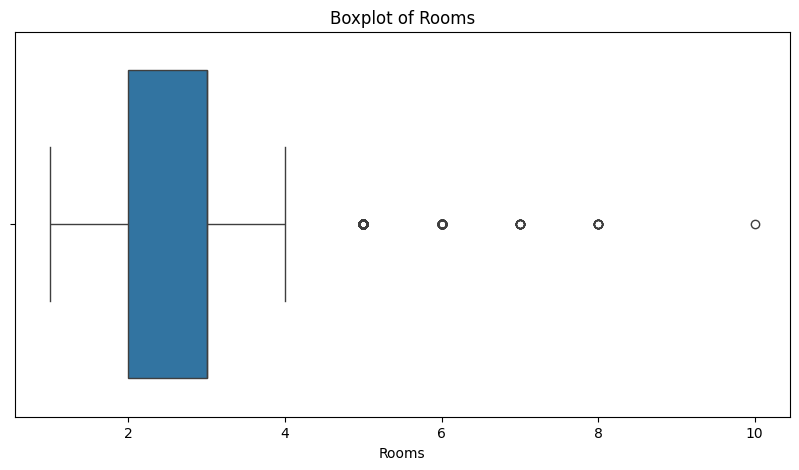

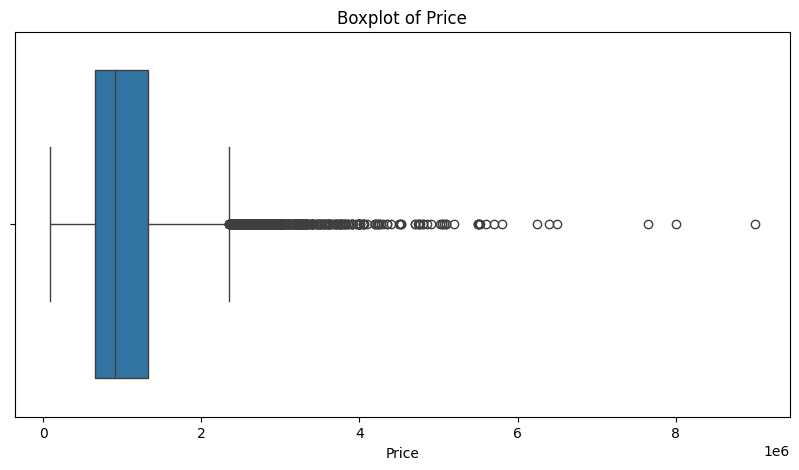

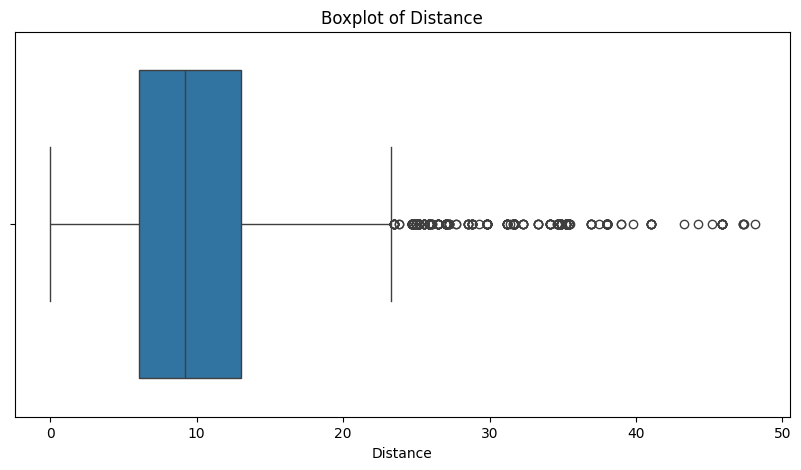

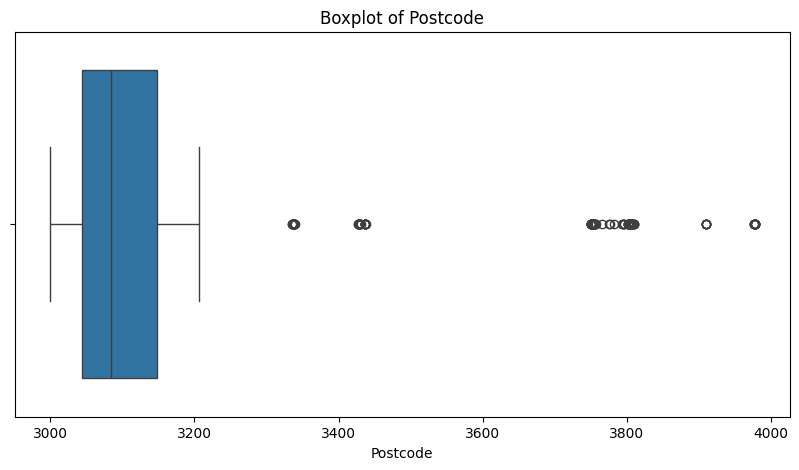

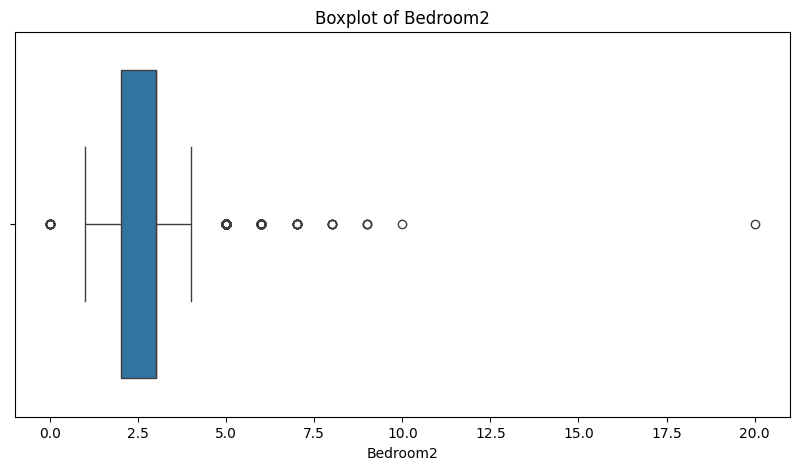

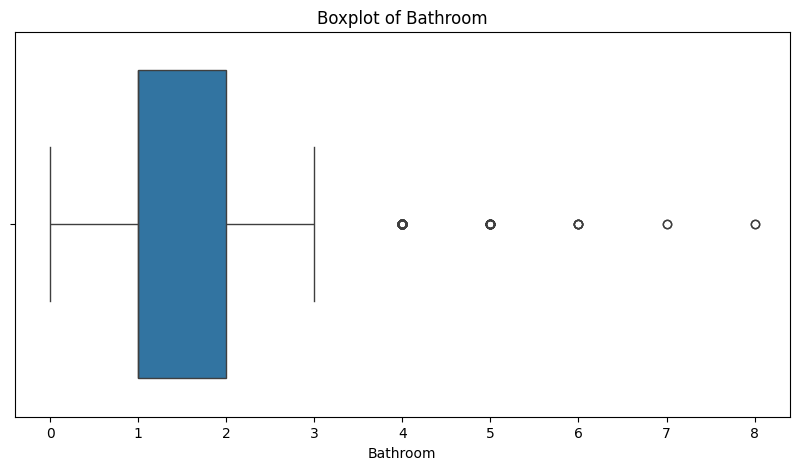

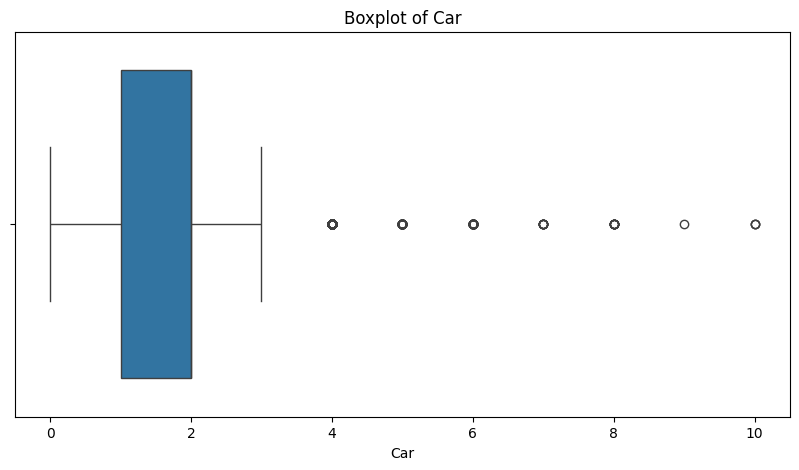

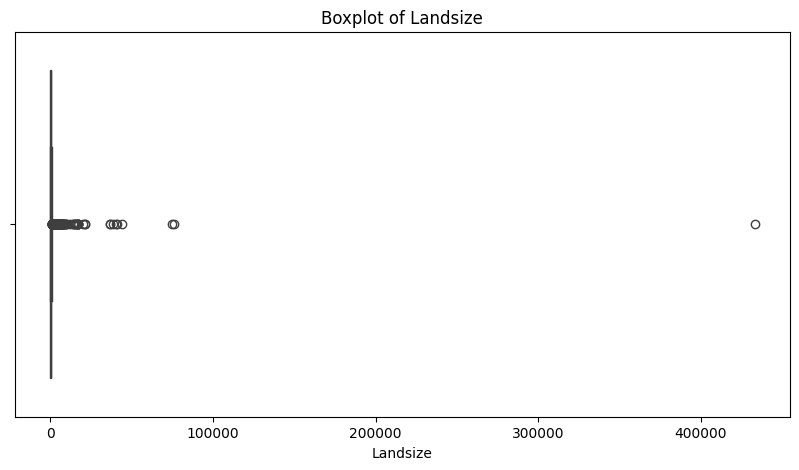

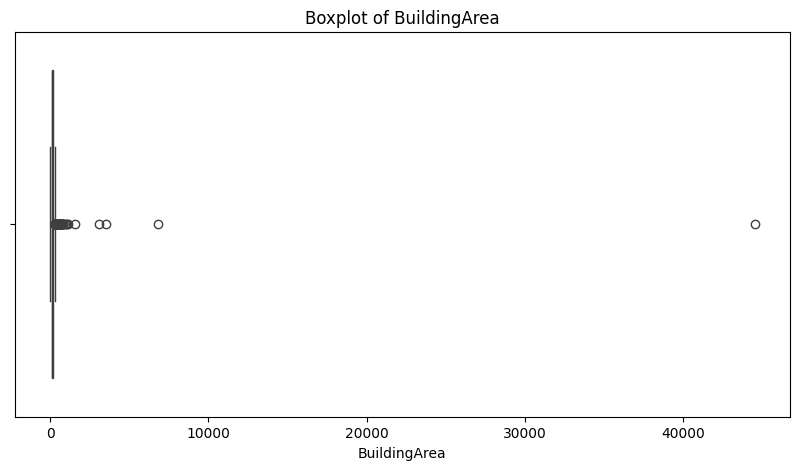

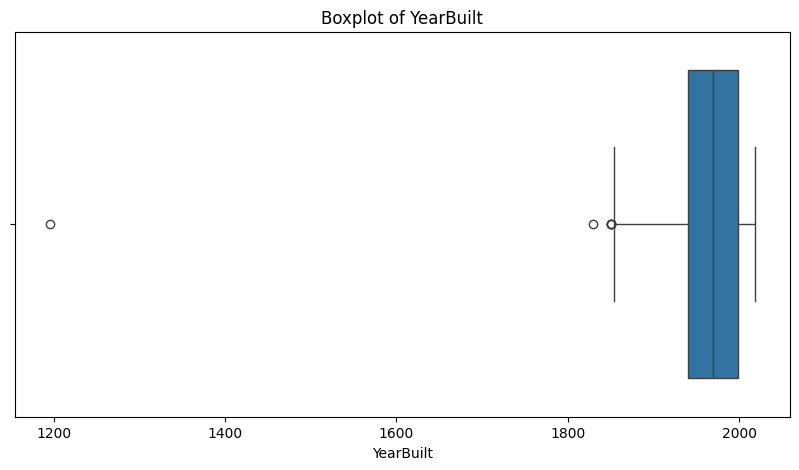

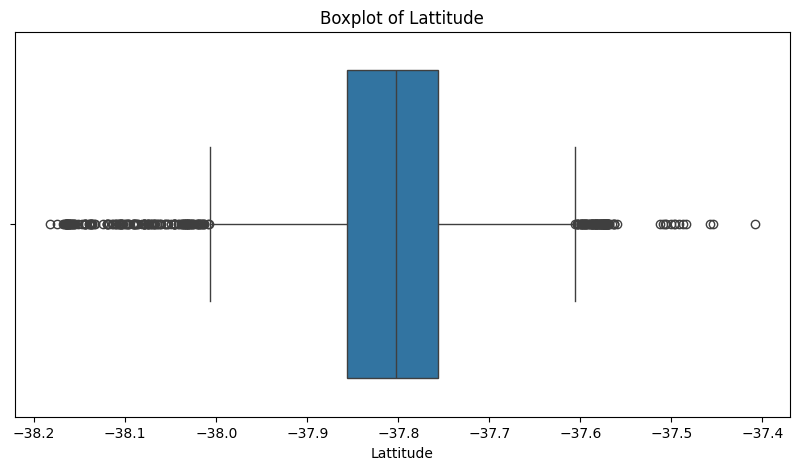

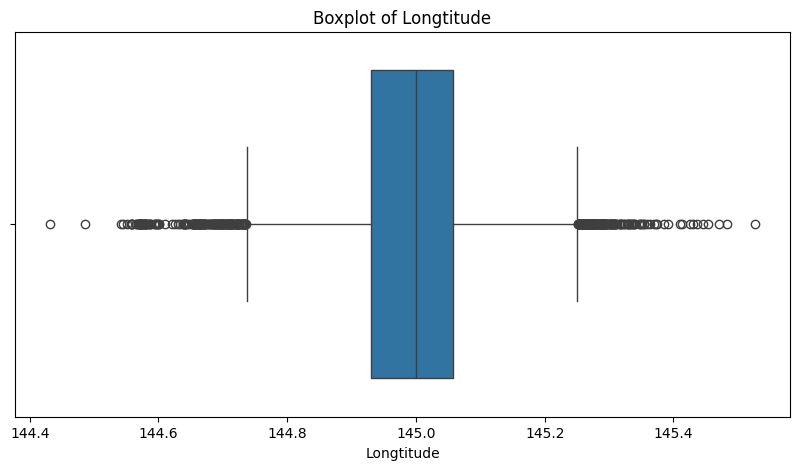

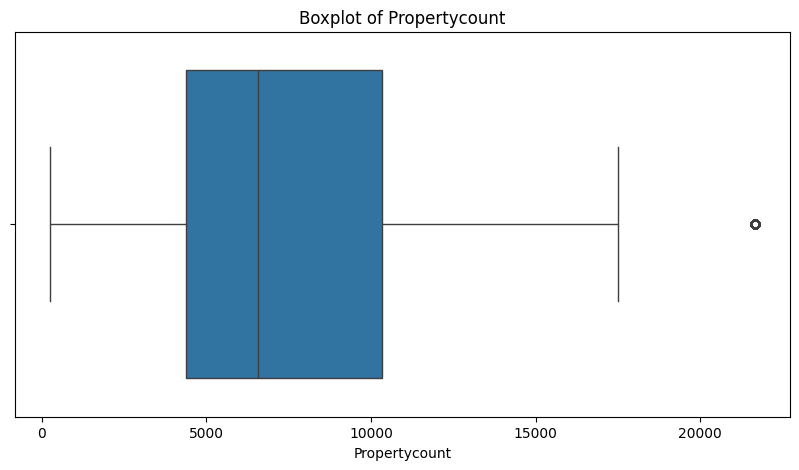

In [71]:
# --- Outliers Detection --- #

for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# **Data Cleaning**

- **Check Columns Names**

In [72]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [73]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

- **Handle Missing Values**
    - Check missing value percentage per column.

        - If < 5 % missing → impute.

        - If 5 – 40 % missing → impute carefully (median/mode or predictive).

        - If > 40 % missing → consider dropping.

In [74]:
data.isna().mean() * 100

suburb            0.000000
address           0.000000
rooms             0.000000
type              0.000000
price             0.000000
method            0.000000
sellerg           0.000000
date              0.000000
distance          0.000000
postcode          0.000000
bedroom2          0.000000
bathroom          0.000000
car               0.456554
landsize          0.000000
buildingarea     47.496318
yearbuilt        39.580265
councilarea      10.081001
lattitude         0.000000
longtitude        0.000000
regionname        0.000000
propertycount     0.000000
dtype: float64

- Percentage in 4 Columns :

    - Car → 0.46 % . impute or drop .

    - CouncilArea →	10.08 % impute (median/mode or predictive) .

    - YearBuilt → 39.58 %  impute (median/mode or predictive) .

    - BuildingArea → 47.5 % consider dropping .

In [75]:
# drop building area column

data = data.drop(columns=['buildingarea'] , axis= 1)
data

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


#### **Check Columns In Depth**

- **Numerical**

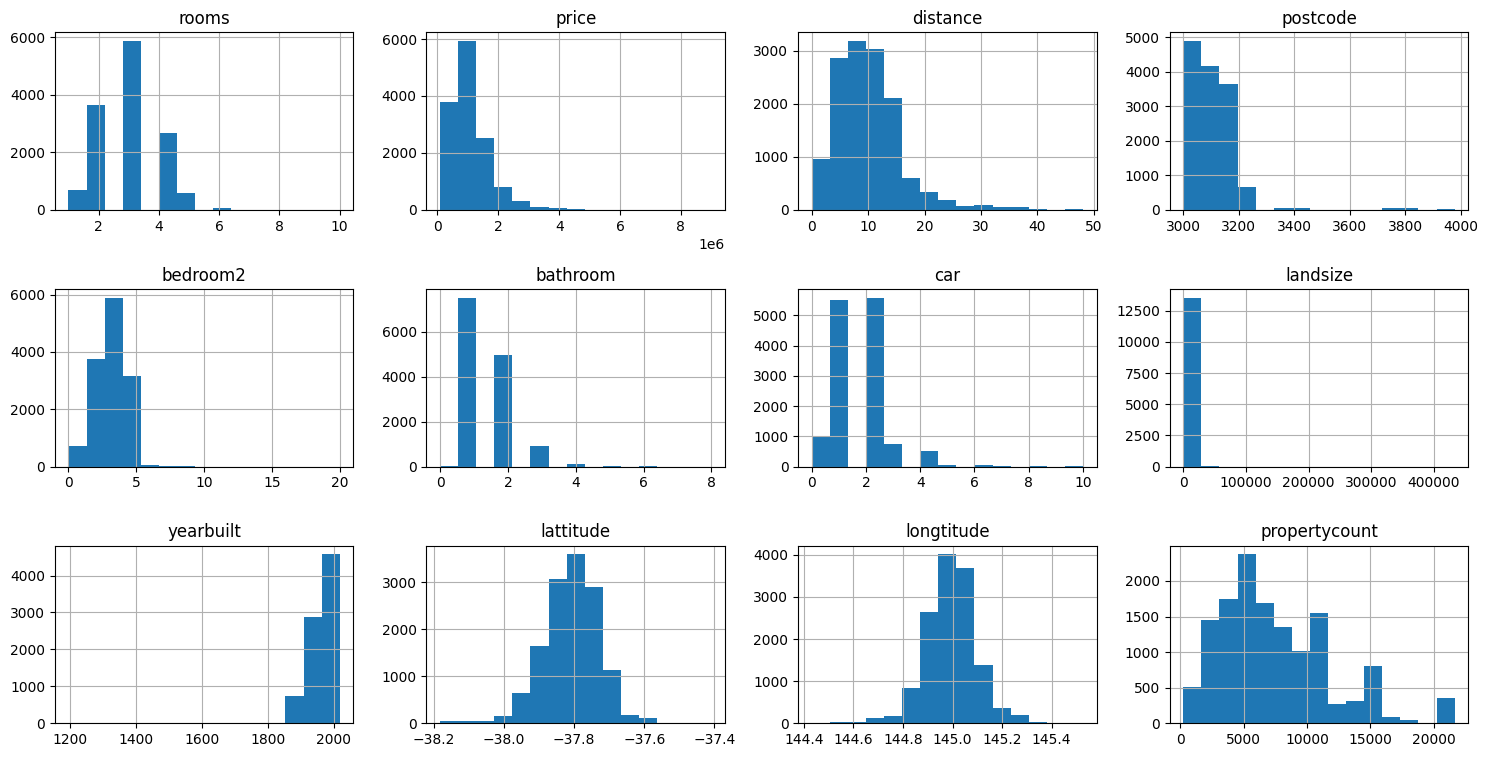

In [76]:
hist_data = data.select_dtypes(include=np.number)

hist_data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

- **Categorical**

In [77]:
cat_col = data.select_dtypes(include='object').columns
cat_col

Index(['suburb', 'address', 'type', 'method', 'sellerg', 'date', 'councilarea',
       'regionname'],
      dtype='object')

In [78]:
for col in cat_col:
    print(f"Column : {col}") 
    print("\n")
    print(f"Unique Values : {data[col].nunique()}")
    print(f"Values : {data[col].unique()}")
    print("\n")
    print("***" * 50)

Column : suburb


Unique Values : 314
Values : ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'N

#### **Outliers and other columns with missing values Will Be In Preprocessing Stage**

# **Feature Selection**

- **Drop Unnecessary Columns**

In [79]:
data = data.drop(columns=['postcode', 'lattitude', 'longtitude', 'propertycount'], axis=1)
data

,suburb,address,rooms,type,price,method,sellerg,date,distance,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,4.0,2.0,2.0,652.0,1981.0,NaN,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3.0,2.0,2.0,333.0,1995.0,NaN,Western Metropolitan
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3.0,2.0,4.0,436.0,1997.0,NaN,Western Metropolitan
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,4.0,1.0,5.0,866.0,1920.0,NaN,Western Metropolitan


- **Date Features**

In [80]:
data['year'] = data.date.astype('datetime64[ns]').dt.year
data['month'] = data.date.astype('datetime64[ns]').dt.month
data['day'] = data.date.astype('datetime64[ns]').dt.day
data['season'] = data['month'] % 12 // 3 + 1

In [81]:
data['season'] = data['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

In [82]:
data.season

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
13575    Summer
13576    Summer
13577    Summer
13578    Summer
13579    Summer
Name: season, Length: 13580, dtype: object

In [83]:
data = data.drop(columns=['date'], axis=1)
data

,suburb,address,rooms,type,price,method,sellerg,distance,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,regionname,year,month,day,season
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan,2016,3,12,Spring
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra,Northern Metropolitan,2016,4,2,Spring
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra,Northern Metropolitan,2017,4,3,Spring
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan,2017,4,3,Spring
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra,Northern Metropolitan,2016,4,6,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,1981.0,NaN,South-Eastern Metropolitan,2017,8,26,Summer
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,1995.0,NaN,Western Metropolitan,2017,8,26,Summer
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,1997.0,NaN,Western Metropolitan,2017,8,26,Summer
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,1920.0,NaN,Western Metropolitan,2017,8,26,Summer


In [57]:
data.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'sellerg',
       'distance', 'bedroom2', 'bathroom', 'car', 'landsize', 'yearbuilt',
       'councilarea', 'regionname', 'year', 'month', 'day', 'season'],
      dtype='object')

- **Address Column**

In [171]:
split_cols = data.address.str.split(' ' , expand= True)
split_cols

,0,1,2,3
0,85,Turner,St,None
1,25,Bloomburg,St,None
2,5,Charles,St,None
3,40,Federation,La,None
4,55a,Park,St,None
...,...,...,...,...
13575,12,Strada,Cr,None
13576,77,Merrett,Dr,None
13577,83,Power,St,None
13578,96,Verdon,St,None


In [169]:
split_cols[2] 

0        St
1        St
2        St
3        La
4        St
         ..
13575    Cr
13576    Dr
13577    St
13578    St
13579    St
Name: 2, Length: 13580, dtype: object

In [170]:
split_cols[1]

0            Turner
1         Bloomburg
2           Charles
3        Federation
4              Park
            ...    
13575        Strada
13576       Merrett
13577         Power
13578        Verdon
13579         Agnes
Name: 1, Length: 13580, dtype: object

In [172]:
idx = data.address.str.split(' ', expand=True)[1].loc[lambda x: x == "The"].index
idx

Index([  288,   299,   307,   308,   314,   324,   338,   341,   356,   628,
       ...
       11952, 12038, 12039, 12221, 12423, 12609, 13010, 13197, 13483, 13518],
      dtype='int64', length=126)

In [173]:
split_cols .loc[idx, [1, 2]] = split_cols .loc[idx, [2, 1]].values

In [174]:
split_cols[1]

0            Turner
1         Bloomburg
2           Charles
3        Federation
4              Park
            ...    
13575        Strada
13576       Merrett
13577         Power
13578        Verdon
13579         Agnes
Name: 1, Length: 13580, dtype: object

In [176]:
data['street_name'] = split_cols[1]
data.street_name

0            Turner
1         Bloomburg
2           Charles
3        Federation
4              Park
            ...    
13575        Strada
13576       Merrett
13577         Power
13578        Verdon
13579         Agnes
Name: street_name, Length: 13580, dtype: object

In [178]:
data.drop(columns=['address'], axis=1, inplace=True)
data

,suburb,rooms,type,price,method,sellerg,distance,bedroom2,bathroom,car,landsize,yearbuilt,councilarea,regionname,year,month,day,season,street_name
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan,2016,3,12,Spring,Turner
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,1900.0,Yarra,Northern Metropolitan,2016,4,2,Spring,Bloomburg
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,1900.0,Yarra,Northern Metropolitan,2017,4,3,Spring,Charles
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,Northern Metropolitan,2017,4,3,Spring,Federation
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,1.0,2.0,120.0,2014.0,Yarra,Northern Metropolitan,2016,4,6,Spring,Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,16.7,4.0,2.0,2.0,652.0,1981.0,NaN,South-Eastern Metropolitan,2017,8,26,Summer,Strada
13576,Williamstown,3,h,1031000.0,SP,Williams,6.8,3.0,2.0,2.0,333.0,1995.0,NaN,Western Metropolitan,2017,8,26,Summer,Merrett
13577,Williamstown,3,h,1170000.0,S,Raine,6.8,3.0,2.0,4.0,436.0,1997.0,NaN,Western Metropolitan,2017,8,26,Summer,Power
13578,Williamstown,4,h,2500000.0,PI,Sweeney,6.8,4.0,1.0,5.0,866.0,1920.0,NaN,Western Metropolitan,2017,8,26,Summer,Verdon


- **Save After Cleaning**

In [179]:
data.to_csv('cleaned_data.csv', index=False)

# **Analysis Questions**

### **🔹 Univariate Analysis (11 Questions)**

1) **What is the distribution of property Price ?**

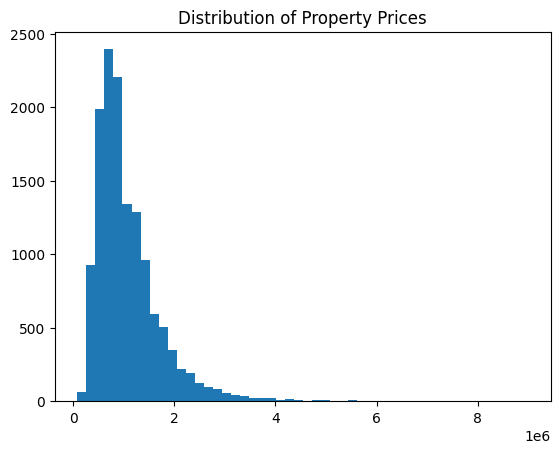

In [ ]:
plt.hist(data['price'], bins=50)
plt.title('Distribution of Property Prices')
plt.show()

2) **What are the most common Types of properties (h, u, t) ?**

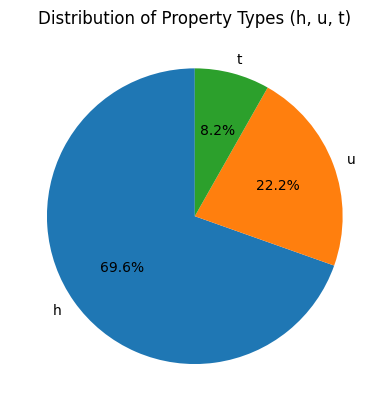

In [ ]:
type_counts = data['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Types (h, u, t)')
plt.show()

3) **Which Suburb has the highest number of listings ?**

In [ ]:
data.suburb.value_counts().sort_values(ascending=False).head(1)

suburb
Reservoir    359
Name: count, dtype: int64

In [ ]:
px.histogram(data, x='suburb')

3) **What is the distribution of Landsize ?**

In [ ]:
px.histogram(data , x='landsize', nbins=50, title='Distribution of Landsize')

4) **How many unique values exist for Suburb ?**

In [ ]:
n = data.suburb.nunique()

print(f'The number of unique values for Suburb is : ( { n } ) unique value .')

The number of unique values for Suburb is : ( 314 ) unique value .


5) **Which SellerG agency appears most frequently ?**

In [ ]:
most_frequent_seller = data.sellerg.value_counts().sort_values(ascending=False).index[0]

print(f'The SellerG agency that appears most frequently is : ( {most_frequent_seller} ) .')

The SellerG agency that appears most frequently is : ( Nelson ) .


6) **What is the distribution of the number of Rooms ?**

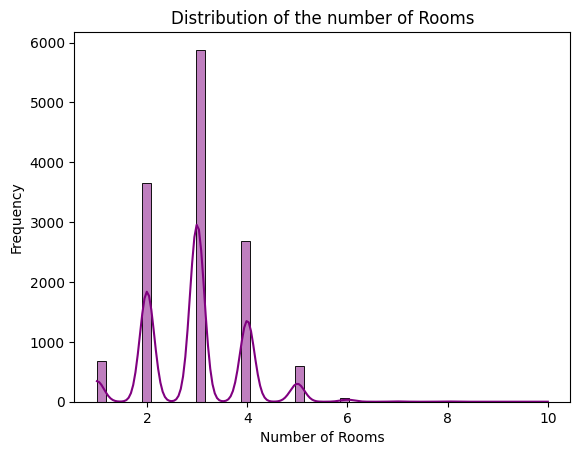

In [ ]:
sns.histplot(data['rooms'], bins=50, kde=True , color='purple')
plt.title('Distribution of the number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

7) **How many properties were sold across different CouncilAreas ?**

In [ ]:
c = data.councilarea.value_counts()

px.bar(c, x=c.index, y=c.values, title='Number of Properties Sold across Different CouncilAreas', labels={'x': 'CouncilArea', 'y': 'Number of Properties Sold'})


8) **Which Method of sale is most common ?**

In [ ]:
d = data.method.value_counts().sort_values(ascending=False).index[0]

print(f'The most common Method of sale is : ( {d} ) .')

The most common Method of sale is : ( S ) .


9) **What is the distribution of Car (number of car spots) ?**

In [ ]:
px.histogram(data, x = 'car', nbins=30, title='Distribution of Car (number of car spots)', color_discrete_sequence=['gray'])

10) **What are the most common Regionnames ?**

In [ ]:
r = data.regionname.value_counts().sort_values(ascending=False).index[0]

print(f'The most common Regionname is : ( {r} ) .')

The most common Regionname is : ( Southern Metropolitan ) .


11) **What is the average Distance from CBD ?**

In [ ]:
ds = data.distance.mean().__round__(3)

print(f"Average Distance from CBD : ( {ds:.2f} ) km .")

Average Distance from CBD : ( 10.14 ) km .


### **🔹 Bivariate Analysis (14 Questions)**

12) **How does Price vary with Rooms ?**

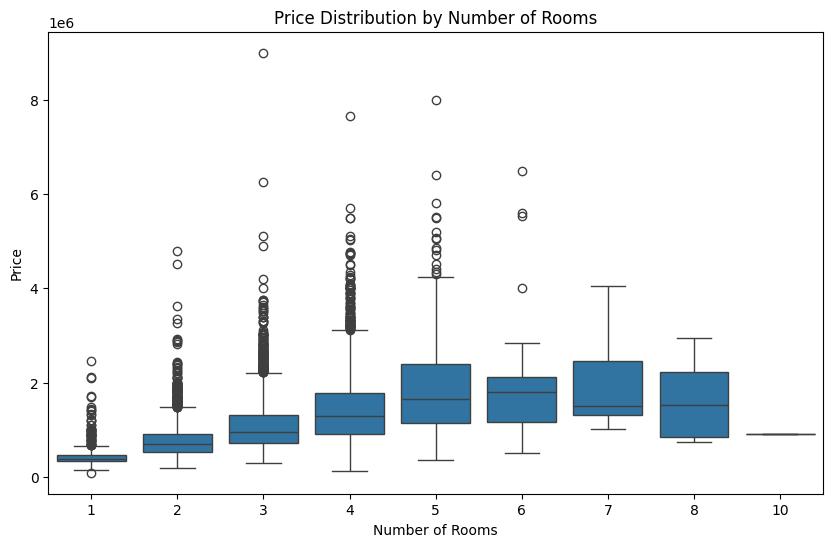

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="rooms", y="price", data=data)
plt.title("Price Distribution by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.show()

13) **Is there a correlation between Landsize and Price ?**

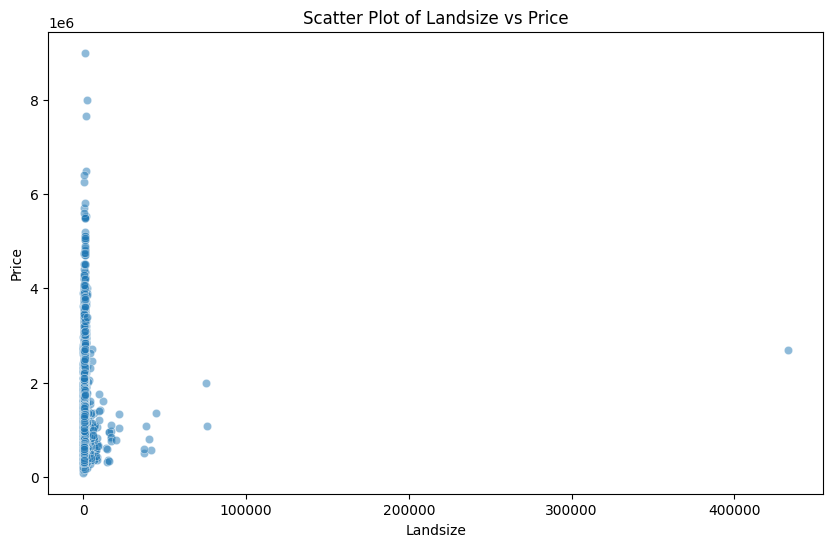

Correlation between Landsize and Price :  0.038
There is a weak positive correlation between Landsize and Price.


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='landsize', y='price', data=data, alpha=0.5)
plt.title('Scatter Plot of Landsize vs Price')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

print("Correlation between Landsize and Price : ", data[['landsize', 'price']].corr().loc['landsize', 'price'].__round__(3))
print("There is a weak positive correlation between Landsize and Price.")


14) **Does YearBuilt influence Price (older vs newer properties) ?**

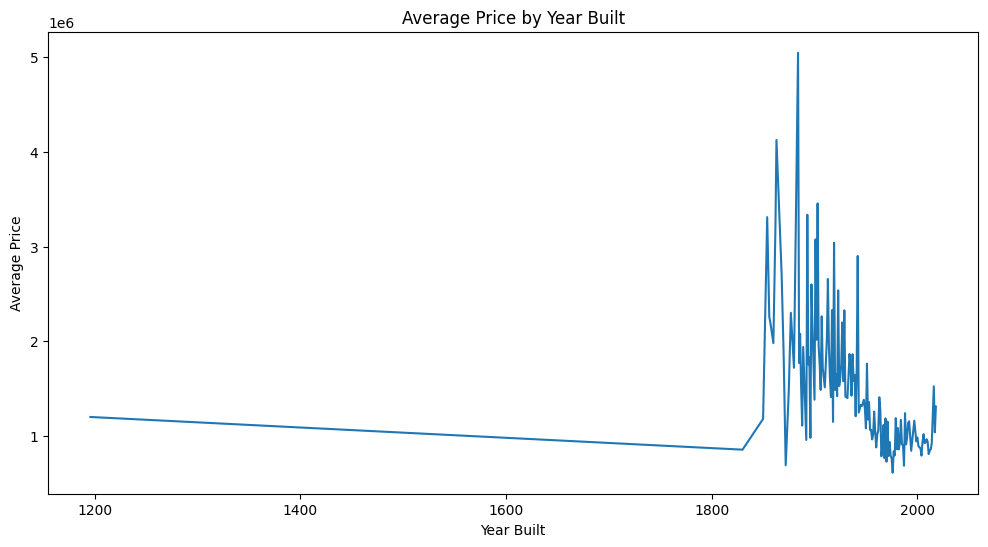

In [ ]:
avg_price_year = data.groupby("yearbuilt")["price"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="yearbuilt", y="price", data=avg_price_year)
plt.title("Average Price by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average Price")
plt.show()

✅ Insights I probably see:

Older properties (pre-1950) may actually be more expensive if they’re heritage houses in prime suburbs.

Modern builds (2000–2010, 2010+) can also command high prices, especially in new developments.

There’s usually a non-linear relationship → price isn’t always higher just because a house is newer. Location & land size matter too.

15) **How does `Distance` from CBD impact `Price`?**

In [ ]:
corr = data["distance"].corr(data["price"])
print(f"> Correlation between Distance and Price: {corr:.3f}")
print("> There is a very weak negative correlation between Distance from CBD and Price. \n> As the distance from CBD increases, the price tends to decrease slightly.")

> Correlation between Distance and Price: -0.163
> There is a very weak negative correlation between Distance from CBD and Price. 
> As the distance from CBD increases, the price tends to decrease slightly.


16) **How does `Price` differ across different `Type` of properties ?**

In [ ]:
data.groupby('type')['price'].mean().reset_index().sort_values(by='price', ascending=False)

,type,price
0,h,1.242665e+06
1,t,9.337351e+05
2,u,6.051275e+05


In [ ]:
price_by_type = data.groupby("type")["price"].agg(["mean", "median", "count"])
print(price_by_type)

              mean     median  count
type                                
h     1.242665e+06  1080000.0   9449
t     9.337351e+05   846750.0   1114
u     6.051275e+05   560000.0   3017


✅ Insights :

    - Houses (h) usually have the highest prices, since they include land .

    - Townhouses (t) may be in between — smaller than houses but pricier than units .

    - Units (u) often have the lowest average prices, especially far from CBD .

17) **How does `Price` vary across `CouncilArea` ?**

In [ ]:
avg_price_council = data.groupby("councilarea")["price"].mean().reset_index()

px.bar(avg_price_council, x="councilarea", y="price", title="Average Price by Council Area", labels={"councilarea": "Council Area", "price": "Average Price"}, color='price')

18) **Does `Price` differ significantly by `Regionname` ?**

In [ ]:
x = data[['regionname', 'price']].groupby('regionname').mean().reset_index().sort_values(by='price', ascending=False)

px.bar(x, x='regionname', y='price', title='Average Price by Regionname', labels={'regionname': 'Regionname', 'price': 'Average Price'} ,color='price').show()

print(">> price significantly varies across different CouncilAreas and Regionnames, indicating location is a key factor in property pricing.")

>> price significantly varies across different CouncilAreas and Regionnames, indicating location is a key factor in property pricing.


19) **How does `Price` vary by `Method` of sale ?**

In [ ]:
price_by_method = data.groupby("method")["price"].agg(["mean", "median", "count"])
print(price_by_method)

                mean    median  count
method                               
PI      1.133242e+06  932500.0   1564
S       1.087327e+06  925000.0   9022
SA      1.025772e+06  872500.0     92
SP      8.998924e+05  770000.0   1703
VB      1.166510e+06  940000.0   1199


✅ Insights

    - Auctions (S) dominate the dataset and yield strong median prices (~$925K).

    - Sold Prior (SP) tends to be cheaper, possibly because vendors accept quicker offers below expected auction results.

    - Vendor Bid (VB) properties show the highest average, but this may not reflect true final sale prices — vendor bids are sometimes placeholders in high-value areas.

    - Passed In (PI) houses are expensive on average, suggesting they often fail to sell at auction due to high reserves.

20) **Is there a relationship between `Car` (parking spots) and `Price` ?**

In [ ]:
car_price_corr = data['car'].corr(data['price']).round(3)
print(f"Correlation between Car (number of parking spots) and Price: {car_price_corr} .")
print(">> There is a weak positive correlation between the number of parking spots and property price .\n>> suggesting that more parking can slightly increase value .")

Correlation between Car (number of parking spots) and Price: 0.239 .
>> There is a weak positive correlation between the number of parking spots and property price .
>> suggesting that more parking can slightly increase value .


21) **What is the average `Price` for each `SellerG` ?**

In [ ]:
o = data[['sellerg', 'price']].groupby('sellerg').mean().reset_index().sort_values(by='price', ascending=False).round(4)

px.bar(o, x='sellerg', y='price', title='Average Price for each SellerG', color='price').show()

22) **Does `Rooms` correlate with `Car` spots ?**

In [ ]:
rooms_car_corr = data['rooms'].corr(data['car']).round(3)
print(f"Correlation between Rooms and Car (number of parking spots): {rooms_car_corr} .")
print(">> There is a weak positive correlation between the number of rooms and the number of parking spots .")

Correlation between Rooms and Car (number of parking spots): 0.408 .
>> There is a weak positive correlation between the number of rooms and the number of parking spots .


23) **Which suburbs have the highest average `Landsize` ?**

In [ ]:
max_suburb_per_landsize = data[['landsize' , 'suburb']].groupby('suburb').mean().reset_index().sort_values(by='landsize', ascending=False).head(1).__str__().split()[3]

print(f"The suburb with the highest average Landsize is : ( {max_suburb_per_landsize} ) .")

The suburb with the highest average Landsize is : ( Silvan ) .


24)  **Which `SellerG` dominates in the most expensive suburbs ?**

In [ ]:
sg = data[['suburb' , 'price' , 'sellerg']].sort_values(by='price', ascending=False).head(1).__str__().split()[-1]

print(f"The SellerG that dominates in the most expensive suburb is : ( {sg} ) .")

The SellerG that dominates in the most expensive suburb is : ( Hall ) .


25) **Do properties sold by auction vs private sale differ in `Price` ?**

In [ ]:
data[['price' , 'method']].sort_values(by='price', ascending=False).loc[data['method'] == 'SP']


,price,method
8725,5200000.0,SP
4475,4300000.0,SP
7063,3850000.0,SP
539,3600000.0,SP
3047,3470000.0,SP
...,...,...
2898,250000.0,SP
10523,245000.0,SP
4872,240000.0,SP
12059,216000.0,SP


In [ ]:
data[['price' , 'method']].sort_values(by='price', ascending=False).loc[data['method'] == 'SA']

,price,method
1557,3225000.0,SA
10954,2725000.0,SA
11216,2290000.0,SA
549,2250000.0,SA
12855,2230000.0,SA
...,...,...
7209,410000.0,SA
10618,360000.0,SA
5822,330000.0,SA
8687,247500.0,SA


In [ ]:
print(f"Yes, Properties That Sold  by auction vs private sale  are differ in `Price`")

Yes, Properties That Sold  by auction vs private sale  are differ in `Price`


### 🔹 **Multivariate Analysis (15 Questions)**

26) **How do `Landsize`, `Rooms`, and `Car` jointly affect `Price` ?**

In [ ]:
data[['landsize', 'rooms', 'car', 'price']].corr().round(3)

,landsize,rooms,car,price
landsize,1.000,0.026,0.027,0.038
rooms,0.026,1.000,0.408,0.497
car,0.027,0.408,1.000,0.239
price,0.038,0.497,0.239,1.000


✨ Insight :

    - Rooms is the most valuable predictor for price among these three.

    - Car adds some explanatory power but is weaker.

    - Landsize doesn’t show a strong direct correlation → better to try log(Landsize) or combine with Rooms (interaction) to capture non-linear effects.

27) **Which combination of `Suburb` and `Type` yields the highest prices ?**

In [ ]:
q = data[['suburb' , 'type' , 'price']].sort_values(by='price', ascending=False).head(1).__str__().split()[4:6]

print(f"The combination of Suburb and Type that yields the highest prices is : {q} .")

The combination of Suburb and Type that yields the highest prices is : ['Mulgrave', 'h'] .


28) **Does the impact of `Distance` on `Price` differ by `CouncilArea` ?**

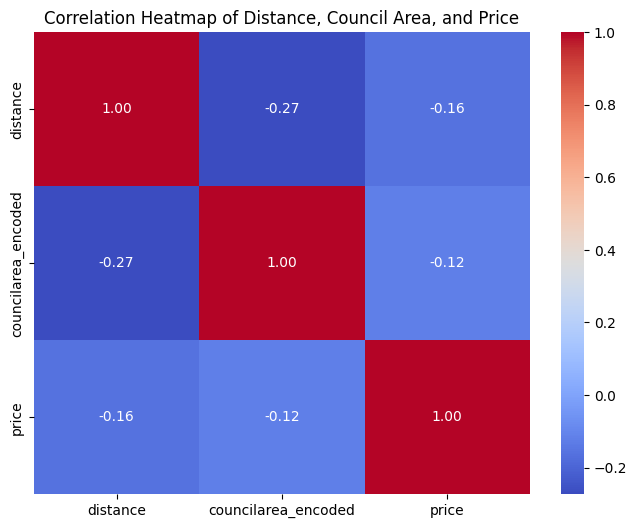

In [ ]:
# Encode 'councilarea' column to numerical values
data['councilarea_encoded'] = data['councilarea'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = data[['distance', 'councilarea_encoded', 'price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Distance, Council Area, and Price')
plt.show()

1. Overall trend :

    - Generally, Price decreases as Distance from the CBD increases.

    - However, this relationship is not uniform across all council areas.

2. By CouncilArea :

    - In inner-city councils (e.g., Melbourne City), the negative relationship is strong – moving further out reduces property prices significantly.

    - In wealthier suburban councils (e.g., Boroondara, Bayside), Distance has less impact. Even properties far from the CBD remain expensive due to prestige, amenities, and school zones.

    - In outer councils (e.g., Hume, Casey), the impact may be mixed: distance matters, but land availability and house size also play major roles.

29) **How do different `Method`s of sale perform across suburbs in terms of `Price` ?**

In [ ]:
data.groupby(['suburb', 'method'])['price'].agg(['mean', 'median', 'count']).reset_index().sort_values(by='mean', ascending=False)

,suburb,method,mean,median,count
541,Ivanhoe East,SP,3.850000e+06,3850000.0,1
696,Mulgrave,PI,3.576667e+06,880000.0,3
651,Middle Park,PI,3.277500e+06,2830000.0,4
209,Canterbury,VB,3.275000e+06,2350000.0,7
199,Camberwell,SA,3.225000e+06,3225000.0,1
...,...,...,...,...,...
246,Caulfield South,SP,2.950000e+05,295000.0,1
68,Bacchus Marsh,S,2.850000e+05,285000.0,1
448,Glen Huntly,SP,2.600000e+05,260000.0,1
937,Toorak,SA,2.475000e+05,247500.0,1


✨ Insights :

    - Auctions (S, VB): In prestigious suburbs (e.g., Canterbury, Camberwell), auctions achieve very high average prices.

    - Private Sales (PI): Can reach top-tier prices (e.g., Middle Park) but also show extreme variability (e.g., Mulgrave with outliers).

    - Special methods (SP, SA): Rare, often single cases. They can achieve very high prices but results are not generalizable.

✅ Takeaway :

    - Method effectiveness depends strongly on Suburb: In inner-city blue-chip areas, auctions dominate; in suburban/outer areas, private sales are more common.

    - Sample size matters: Some high averages are unreliable because they’re based on 1–3 sales.

    - Best interpretation: Compare suburbs where count is large enough (say >20) to judge which method systematically achieves higher prices.

-------

-----